# Ahoj

Použijme Pandas - knihovnu na zpracovávání tabulkových dat, [dokumentace tady](http://pandas.pydata.org/pandas-docs/version/0.18.1/) - k otevření dat z počítače ve sluncárně.

In [7]:
import pandas as pd
import datetime
log = pd.read_csv("http://radio-slunce.local/log/all",
                  parse_dates=True, date_parser=lambda ts: datetime.datetime.fromtimestamp(float(ts)),
                  index_col=0, header=None,
                  delim_whitespace=True, names=['SigLevel'])

A vykresleme je!

In [8]:
type(log)

pandas.core.frame.DataFrame

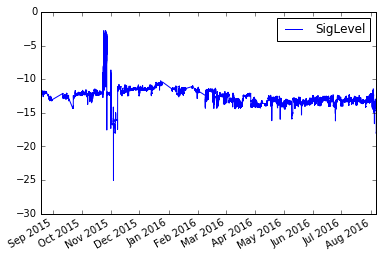

In [9]:
%matplotlib inline
log.plot()

In [10]:
import numpy as np
stamps = log.index.astype(np.int64)
sig_level = log['SigLevel'].as_matrix()
stamps = stamps / (1000 * 1000 * 1000)

from scipy.interpolate import interp1d
f = interp1d(stamps[::10], sig_level[::10])


In [ ]:
import math
import matplotlib.pyplot as plt
import datetime

1

In [36]:
def plot_for_period(period):
    s = np.zeros(int(period / 100), dtype=np.float64)

    for x in range(math.ceil(float(stamps.min())/(period)), math.floor(float(stamps.max())/(period))):
        for i in range(0, len(s)):
            v = f(x * period + i * 100)
            if not (np.isnan(v) or np.isinf(v)):
                s[i] += v
    plt.figure(figsize=(10, 2))
    plt.plot([datetime.datetime.utcfromtimestamp(i * 100) for i in range(len(s))], s)


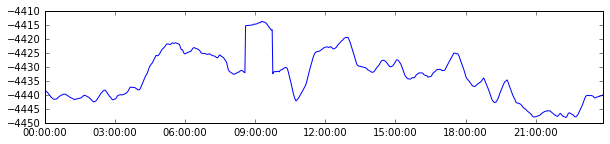

In [37]:
plot_for_period(86164)

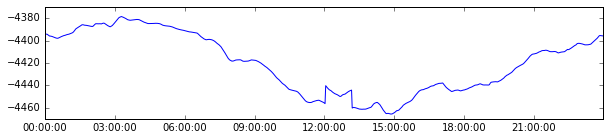

In [38]:
plot_for_period(3600 * 24)